In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)
    
# Visit the Mars News site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [2]:
table_df = pd.read_html(url)
table_df = table_df[0]
table_df

id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]

In [3]:
table=html_soup.find_all('tr',class_='data-row')

In [4]:
weather_data=[]
for i in range(len(table)):
    weather_data[i:]=[table[i].text.replace('\n',' ').split()]
weather_data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [5]:
table_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [6]:
table_df.loc[:,'terrestrial_date']=pd.to_datetime(table_df.loc[:,'terrestrial_date'])

In [7]:
table_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
#question 6. how many months exist on mars?
table_df.loc[:,'month'].unique()
#there are 12 months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

In [9]:
#question 7. how many martian days worth of data exist?
len(table_df.loc[:,'sol'].unique())
#there are 1867 days worth of data 

1867

The coldest month was 3, and the warmest month was 8.


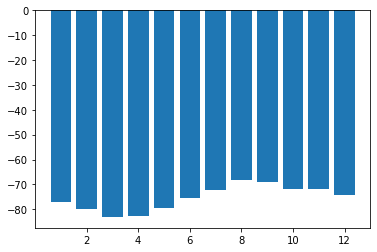

In [10]:
#question 8 what are the coldest and the warmest months on Mars?
temp=table_df.groupby(by='month')['min_temp'].mean()

plt.bar(temp.index,temp)

coldest_month = temp.idxmin()
warmest_month = temp.idxmax()
print(f'The coldest month was {coldest_month}, and the warmest month was {warmest_month}.')

The month with the lowest pressure was 6, and the month with the highest pressure was 9.


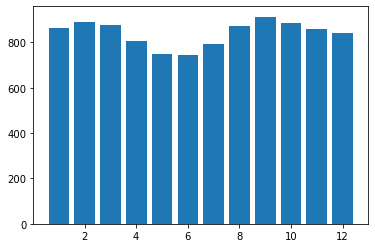

In [11]:
#question 9 what months have the lowest and highest atmospheric pressure on Mars?
pressure=table_df.groupby(by='month')['pressure'].mean()

plt.bar(pressure.index,pressure)

low_pressure = pressure.idxmin()
high_pressure = pressure.idxmax()
print(f'The month with the lowest pressure was {low_pressure}, and the month with the highest pressure was {high_pressure}.')

In [12]:
#question 10 About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
mars_start = table_df.loc[0,'ls']
earth_start = table_df.loc[0,'terrestrial_date']
rotation = table_df[table_df['ls'] == mars_start].reset_index(drop=True)
earth_end = rotation.loc[1,'terrestrial_date']

answer = earth_end - earth_start
answer
#686 days

Timedelta('686 days 00:00:00')

In [13]:
table_df.to_csv('Mars_Temp_Data.csv')